In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import sys 
sys.path.append("../../")
from proj_mod import drop_extreme

In [2]:
all_data=pd.read_csv("../../data/processed/all_data_inf_adj_collection.csv")
all_data.columns

Index(['Unnamed: 0', 'Date', 'fed_dff_daily',
       'ppi314_monthly_pro_change_inf_adj',
       'ppi332_monthly_pro_change_inf_adj',
       'ppi333_monthly_pro_change_inf_adj',
       'ppi334_monthly_pro_change_inf_adj',
       'ppi335_monthly_pro_change_inf_adj',
       'ppi336_monthly_pro_change_inf_adj',
       'ppi339_monthly_pro_change_inf_adj',
       'ppi516_monthly_pro_change_inf_adj',
       'ppi517_monthly_pro_change_inf_adj',
       'ppi5132_monthly_pro_change_inf_adj',
       'ppi5182_monthly_pro_change_inf_adj',
       'tech_index_20days_prior_pro_change_inf_adj',
       'cop_20days_prior_pro_change_inf_adj',
       'gold_20days_prior_pro_change_inf_adj',
       'silv_20days_prior_pro_change_inf_adj',
       'pal_20days_prior_pro_change_inf_adj',
       'plat_20days_prior_pro_change_inf_adj',
       'crude_oil_20days_prior_pro_change_inf_adj'],
      dtype='object')

In [3]:
all_data=all_data.drop("Unnamed: 0", axis=1)
all_data.columns

Index(['Date', 'fed_dff_daily', 'ppi314_monthly_pro_change_inf_adj',
       'ppi332_monthly_pro_change_inf_adj',
       'ppi333_monthly_pro_change_inf_adj',
       'ppi334_monthly_pro_change_inf_adj',
       'ppi335_monthly_pro_change_inf_adj',
       'ppi336_monthly_pro_change_inf_adj',
       'ppi339_monthly_pro_change_inf_adj',
       'ppi516_monthly_pro_change_inf_adj',
       'ppi517_monthly_pro_change_inf_adj',
       'ppi5132_monthly_pro_change_inf_adj',
       'ppi5182_monthly_pro_change_inf_adj',
       'tech_index_20days_prior_pro_change_inf_adj',
       'cop_20days_prior_pro_change_inf_adj',
       'gold_20days_prior_pro_change_inf_adj',
       'silv_20days_prior_pro_change_inf_adj',
       'pal_20days_prior_pro_change_inf_adj',
       'plat_20days_prior_pro_change_inf_adj',
       'crude_oil_20days_prior_pro_change_inf_adj'],
      dtype='object')

In [4]:
all_data=all_data.reindex(columns=['Date', 
       'tech_index_20days_prior_pro_change_inf_adj',
       'fed_dff_daily', 
       'ppi314_monthly_pro_change_inf_adj',
       'ppi332_monthly_pro_change_inf_adj',
       'ppi333_monthly_pro_change_inf_adj',
       'ppi334_monthly_pro_change_inf_adj',
       'ppi335_monthly_pro_change_inf_adj',
       'ppi336_monthly_pro_change_inf_adj',
       'ppi339_monthly_pro_change_inf_adj',
       'ppi516_monthly_pro_change_inf_adj',
       'ppi517_monthly_pro_change_inf_adj',
       'ppi5132_monthly_pro_change_inf_adj',
       'ppi5182_monthly_pro_change_inf_adj',
       'cop_20days_prior_pro_change_inf_adj',
       'gold_20days_prior_pro_change_inf_adj',
       'silv_20days_prior_pro_change_inf_adj',
       'pal_20days_prior_pro_change_inf_adj',
       'plat_20days_prior_pro_change_inf_adj',
       'crude_oil_20days_prior_pro_change_inf_adj'])


all_data.columns

Index(['Date', 'tech_index_20days_prior_pro_change_inf_adj', 'fed_dff_daily',
       'ppi314_monthly_pro_change_inf_adj',
       'ppi332_monthly_pro_change_inf_adj',
       'ppi333_monthly_pro_change_inf_adj',
       'ppi334_monthly_pro_change_inf_adj',
       'ppi335_monthly_pro_change_inf_adj',
       'ppi336_monthly_pro_change_inf_adj',
       'ppi339_monthly_pro_change_inf_adj',
       'ppi516_monthly_pro_change_inf_adj',
       'ppi517_monthly_pro_change_inf_adj',
       'ppi5132_monthly_pro_change_inf_adj',
       'ppi5182_monthly_pro_change_inf_adj',
       'cop_20days_prior_pro_change_inf_adj',
       'gold_20days_prior_pro_change_inf_adj',
       'silv_20days_prior_pro_change_inf_adj',
       'pal_20days_prior_pro_change_inf_adj',
       'plat_20days_prior_pro_change_inf_adj',
       'crude_oil_20days_prior_pro_change_inf_adj'],
      dtype='object')

In [5]:
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import SplineTransformer
from sklearn.linear_model import LinearRegression

In [6]:
all_data

,Date,tech_index_20days_prior_pro_change_inf_adj,fed_dff_daily,ppi314_monthly_pro_change_inf_adj,ppi332_monthly_pro_change_inf_adj,ppi333_monthly_pro_change_inf_adj,ppi334_monthly_pro_change_inf_adj,ppi335_monthly_pro_change_inf_adj,ppi336_monthly_pro_change_inf_adj,ppi339_monthly_pro_change_inf_adj,ppi516_monthly_pro_change_inf_adj,ppi517_monthly_pro_change_inf_adj,ppi5132_monthly_pro_change_inf_adj,ppi5182_monthly_pro_change_inf_adj,cop_20days_prior_pro_change_inf_adj,gold_20days_prior_pro_change_inf_adj,silv_20days_prior_pro_change_inf_adj,pal_20days_prior_pro_change_inf_adj,plat_20days_prior_pro_change_inf_adj,crude_oil_20days_prior_pro_change_inf_adj
0,2014-01-02,NaN,0.08,2.446838,-0.103829,0.017017,-0.370646,-0.155464,-0.116273,-0.118845,1.594599,-0.370646,-0.478704,-0.370646,NaN,NaN,NaN,NaN,NaN,NaN
1,2014-01-03,NaN,0.08,2.446838,-0.103829,0.017017,-0.370646,-0.155464,-0.116273,-0.118845,1.594599,-0.370646,-0.478704,-0.370646,NaN,NaN,NaN,NaN,NaN,NaN
2,2014-01-06,NaN,0.08,2.446838,-0.103829,0.017017,-0.370646,-0.155464,-0.116273,-0.118845,1.594599,-0.370646,-0.478704,-0.370646,NaN,NaN,NaN,NaN,NaN,NaN
3,2014-01-07,NaN,0.07,2.446838,-0.103829,0.017017,-0.370646,-0.155464,-0.116273,-0.118845,1.594599,-0.370646,-0.478704,-0.370646,NaN,NaN,NaN,NaN,NaN,NaN
4,2014-01-08,NaN,0.07,2.446838,-0.103829,0.017017,-0.370646,-0.155464,-0.116273,-0.118845,1.594599,-0.370646,-0.478704,-0.370646,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2563,2024-10-24,2.186840,4.83,-0.668452,0.097178,0.049298,0.216057,-0.278612,0.226184,0.170434,0.823516,0.541414,0.905231,-0.102929,-2.645986,2.730603,5.925661,11.361568,3.770550,0.910874
2564,2024-10-25,2.039159,4.83,-0.668452,0.097178,0.049298,0.216057,-0.278612,0.226184,0.170434,0.823516,0.541414,0.905231,-0.102929,-6.166548,2.570648,4.807398,13.892089,1.598315,6.069282
2565,2024-10-28,2.764371,4.83,-0.668452,0.097178,0.049298,0.216057,-0.278612,0.226184,0.170434,0.823516,0.541414,0.905231,-0.102929,-4.889680,3.159984,6.734911,-98.798978,3.077340,-1.133477
2566,2024-10-29,3.462442,4.83,-0.668452,0.097178,0.049298,0.216057,-0.278612,0.226184,0.170434,0.823516,0.541414,0.905231,-0.102929,-4.224189,4.445636,9.329965,21.462597,7.277829,-1.529923


In [7]:
all_data_extended = all_data.copy(deep=True)

arr_mse_kfold_collection=[] #index zero is for the training with extreme values, and index one is for the training without extreme values. 
arr_mse_kfold_de_collection=[] #index zero is for the training with extreme values, and index one is for the training without extreme values. 

    
all_data_extended_train = all_data_extended[all_data_extended["Date"] < "2024-01-01"].dropna()
X_train=all_data_extended_train.iloc[:,2:]
y_train=all_data_extended_train.iloc[:,1]
spineline_pipe = Pipeline([
("std", StandardScaler()),               # 1) Standardize features
("spline", SplineTransformer(n_knots=2, degree=1)),
("regressor", LinearRegression())        # 2) Fit a regression model
])

time_kfold=TimeSeriesSplit(n_splits=5)
fold_mse=[]
fold_mse_de=[]
#First for without deleting extreme values. 
for index_train, index_test in time_kfold.split(X_train): 
    X_tt=X_train.iloc[index_train]
    y_tt=y_train.iloc[index_train]
    X_ho=X_train.iloc[index_test]
    y_ho=y_train.iloc[index_test]
    all_data_ho_de=drop_extreme.drop_by_sort(df_in=all_data_extended_train.iloc[index_test], fl_low=0.01, fl_high=0.99)
    X_ho_de=all_data_ho_de.iloc[:,2:]
    y_ho_de=all_data_ho_de.iloc[:,1]
    spineline_pipe.fit(X=X_tt,y=y_tt)
    pred=spineline_pipe.predict(X=X_ho)
    error=mean_squared_error(y_pred=pred,y_true=y_ho)
    fold_mse.append(error)
    pred_de=spineline_pipe.predict(X=X_ho_de)
    error_de=mean_squared_error(y_pred=pred_de,y_true=y_ho_de)
    fold_mse_de.append(error_de)
mean_error=np.mean(fold_mse)
arr_mse_kfold_collection.append([])
arr_mse_kfold_collection[-1].append(mean_error)
mean_error_de=np.mean(fold_mse_de)
arr_mse_kfold_de_collection.append([])
arr_mse_kfold_de_collection[-1].append(mean_error_de)
print("mse trained WITHOUT deleting extreme values is "+str(mean_error)+" with k fold.")
fold_mse=[]
fold_mse_de=[]
#Then the one with deleting extreme values. 
for index_train, index_test in time_kfold.split(X_train): 
    all_data_tt=drop_extreme.drop_by_sort(df_in=all_data_extended_train.iloc[index_train], fl_low=0.001, fl_high=0.999)  #all_data_extended_train.iloc[index_train]
    all_data_ho=drop_extreme.drop_by_sort(df_in=all_data_extended_train.iloc[index_test], fl_low=0.01, fl_high=0.99) #all_data_extended_train.iloc[index_test]
    X_tt=all_data_tt.iloc[:,2:] #drop_extreme.drop_by_sort(df_in=X_train.iloc[index_train], fl_low=0.01, fl_high=0.99)     #X_de_train.iloc[index_train]
    y_tt=all_data_tt.iloc[:,1] #drop_extreme.drop_by_sort(df_in=y_train.iloc[index_train], fl_low=0.01, fl_high=0.99) 
    X_ho_de=all_data_ho.iloc[:,2:] #drop_extreme.drop_by_sort(df_in=X_train.iloc[index_test], fl_low=0.01, fl_high=0.99) #X_train.iloc[index_test]
    y_ho_de=all_data_ho.iloc[:,1] #drop_extreme.drop_by_sort(df_in=y_train.iloc[index_test], fl_low=0.01, fl_high=0.99) #y_train.iloc[index_test]
    X_ho=X_train.iloc[index_test]
    y_ho=y_train.iloc[index_test]
    spineline_pipe.fit(X=X_tt,y=y_tt)
    pred=spineline_pipe.predict(X=X_ho)
    error=mean_squared_error(y_pred=pred,y_true=y_ho)
    fold_mse.append(error)
    pred_de=spineline_pipe.predict(X=X_ho_de)
    error_de=mean_squared_error(y_pred=pred_de,y_true=y_ho_de)
    fold_mse_de.append(error_de)
mean_error=np.mean(fold_mse)
arr_mse_kfold_collection[-1].append(mean_error)
mean_error_de=np.mean(fold_mse_de)
arr_mse_kfold_de_collection[-1].append(mean_error_de)
print("mse trained WITH deleting extreme values is "+str(mean_error)+" with k fold.")


mse trained WITHOUT deleting extreme values is 33.894983104275774 with k fold.
mse trained WITH deleting extreme values is 33.377248684416614 with k fold.


In [8]:
arr_mse_kfold_collection

[[np.float64(33.894983104275774), np.float64(33.377248684416614)]]

In [9]:
arr_mse_kfold_de_collection

[[np.float64(30.41430156712179), np.float64(29.82672081366683)]]

In [10]:
arr_in=np.array(arr_mse_kfold_de_collection).transpose()
np.array(arr_mse_kfold_collection).transpose()

array([[33.8949831 ],
       [33.37724868]])

In [ ]:
all_data_extended = all_data.copy(deep=True)
all_data_extended_train=all_data_extended[all_data_extended["Date"]<"2024-01-01"].dropna()
all_data_extended_train_de=drop_extreme.drop_by_sort(df_in=all_data_extended_train,fl_low=0.001,fl_high=0.999)
all_data_extended_test=all_data_extended[all_data_extended["Date"]>="2024-01-01"].dropna()
all_data_extended_test_de=drop_extreme.drop_by_sort(df_in=all_data_extended_test,fl_low=0.01,fl_high=0.99)

In [14]:
X_train=all_data_extended_train.iloc[:,2:]
y_train=all_data_extended_train.iloc[:,1]
X_de_train=all_data_extended_train_de.iloc[:,2:]
y_de_train=all_data_extended_train_de.iloc[:,1]
X_test=all_data_extended_test.iloc[:,2:]
y_test=all_data_extended_test.iloc[:,1]
X_de_test=all_data_extended_test_de.iloc[:,2:]
y_de_test=all_data_extended_test_de.iloc[:,1]

### First the one trained without extreme values. 

In [15]:
spineline_pipe = Pipeline([
    ("std", StandardScaler()),               # 1) Standardize features
    ("spline", SplineTransformer(n_knots=2, degree=1)),
    ("regressor", LinearRegression())        # 2) Fit a regression model
])

In [16]:
spineline_pipe.fit(X=X_de_train,y=y_de_train)

Pipeline(steps=[('std', StandardScaler()),
                ('spline', SplineTransformer(degree=1, n_knots=2)),
                ('regressor', LinearRegression())])

In [ ]:
pred_extreme=spineline_pipe.predict(X=X_test)
pred_noextreme=spineline_pipe.predict(X_de_test)

#### Graph for trained without extreme, tested with extreme. 

In [ ]:
mse_extreme=mean_squared_error(y_pred=pred_extreme,y_true=y_test)
print("mse (trained without extreme, tested with extreme) is ", mse_extreme)

25.75188834708212

<function matplotlib.pyplot.show(close=None, block=None)>

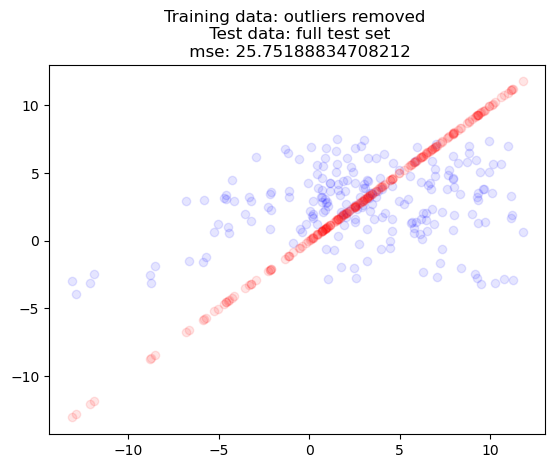

In [33]:
plt.scatter(x=y_test,y=pred_extreme,c="b",alpha=0.1,label="pred")
plt.scatter(x=y_test,y=y_test,c="r",alpha=0.1,label="true")
plt.title(f"Training data: outliers removed \n Test data: full test set\n mse: {mse_extreme}")
plt.show

#### Graph for training without extreme, test without extreme. 

In [36]:
mse_noextreme=mean_squared_error(y_pred=pred_noextreme,y_true=y_de_test)
print("mse (trained without extreme, tested without extreme) is ", mse_noextreme)

mse (trained without extreme, tested without extreme) is  23.327792137507924


<function matplotlib.pyplot.show(close=None, block=None)>

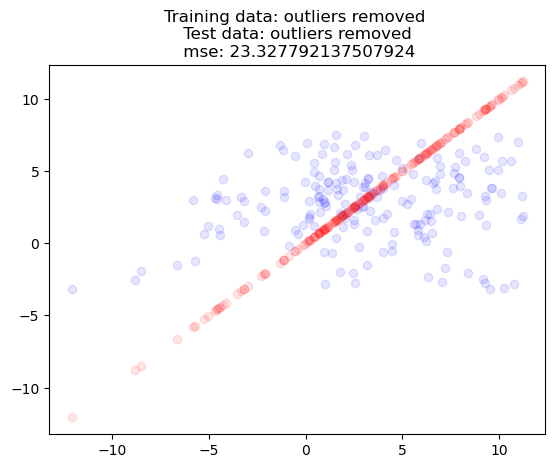

In [37]:
plt.scatter(x=y_de_test,y=pred_noextreme,c="b",alpha=0.1,label="pred")
plt.scatter(x=y_de_test,y=y_de_test,c="r",alpha=0.1,label="true")
plt.title(f"Training data: outliers removed \n Test data: outliers removed \n mse: {mse_noextreme}")
plt.show

#### Then, the one trained with extreme values. 

In [23]:
spineline_pipe = Pipeline([
    ("std", StandardScaler()),               # 1) Standardize features
    ("spline", SplineTransformer(n_knots=2, degree=1)),
    ("regressor", LinearRegression())        # 2) Fit a regression model
])

In [24]:
spineline_pipe.fit(X=X_train,y=y_train)

Pipeline(steps=[('std', StandardScaler()),
                ('spline', SplineTransformer(degree=1, n_knots=2)),
                ('regressor', LinearRegression())])

In [25]:
pred_extreme=spineline_pipe.predict(X=X_test)

In [26]:
pred_noextreme=spineline_pipe.predict(X_de_test)

The graph for training with extreme, test with extreme: 

In [40]:
mse_extreme=mean_squared_error(y_pred=pred_extreme,y_true=y_test)
print("mse (trained with extreme and tested with extreme) is ", mse_extreme)

mse (trained with extreme and tested with extreme) is  25.75188834708212


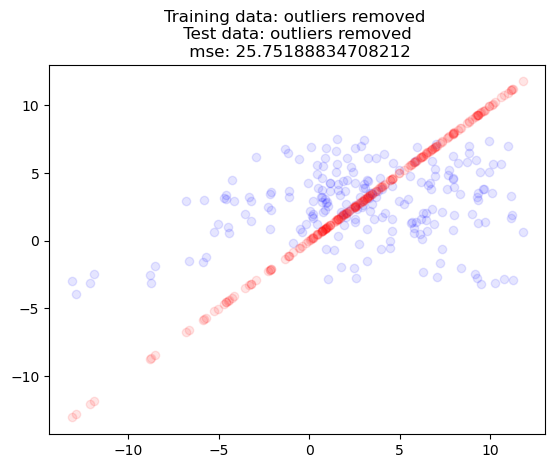

In [42]:
plt.scatter(x=y_test,y=pred_extreme,c="b",alpha=0.1)
plt.scatter(x=y_test,y=y_test,c="r",alpha=0.1)
plt.title(f"Training data: outliers removed \n Test data: outliers removed \n mse: {mse_extreme}")
plt.show()

#### The graph for training with extreme, test without extreme: 

In [44]:
mse_noextreme = mean_squared_error(y_pred=pred_noextreme,y_true=y_de_test)
print("mse (trained with extreme and tested with no extreme) is ", mse_noextreme)

mse (trained with extreme and tested with no extreme) is  23.327792137507924


<function matplotlib.pyplot.show(close=None, block=None)>

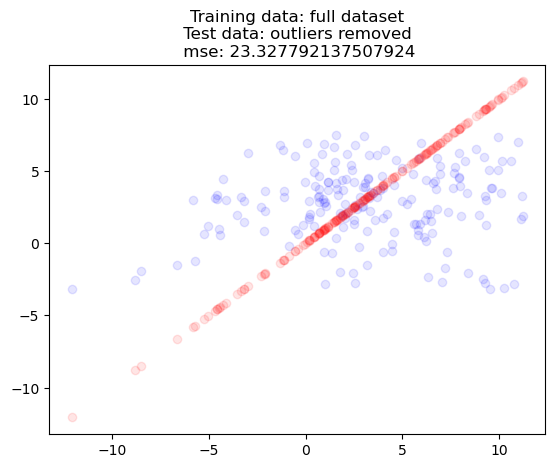

In [45]:
plt.scatter(x=y_de_test,y=pred_noextreme,c="b",alpha=0.1)
plt.scatter(x=y_de_test,y=y_de_test,c="r",alpha=0.1)
plt.title(f"Training data: full dataset\n Test data: outliers removed \n mse: {mse_noextreme}")
plt.show